# <font color="red">Mineração de Dados Não Estruturados</font>
## <span style="color:red">Aula 01 - Nivelamento (Conceitos Básicos) - Parte 2</span>

#### Material de Apoio - Prática sobre Medidas de Proximidade

# Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

# Medidas de Proximidade

Para realizarmos experimentos com medidas de proximidade, usaremos uma amostra de uma base de dados sobre campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas. Mais informações sobre o conjunto de dados estão disponíveis em Moro et al. (2014).

[1] [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014



# Leitura dos dados *bank_marketing.csv*

Usamos o pandas para leitura do arquivo CSV.
Em seguida, as 30 primeiras linhas são exibidas.
Os dados já estão pré-processados.

Cada linha representa um cliente do banco. Cada coluna representa um atributo do cliente.

Atributos:

* **age**: Idade do cliente
* **balance**: saldo em conta do cliente
* **duration**: duração (em segundos) do último contato do banco com o cliente

In [ ]:
dados = pd.read_csv('bank_marketing.csv')
dados

,age,balance,duration
0,30,1787,79
1,33,4789,220
2,35,1350,185
3,30,1476,199
4,59,0,226
...,...,...,...
4516,33,-333,329
4517,57,-3313,153
4518,57,295,151
4519,28,1137,129


In [ ]:
dados.head(30)

,age,balance,duration
0,30,1787,79
1,33,4789,220
2,35,1350,185
3,30,1476,199
4,59,0,226
5,35,747,141
6,36,307,341
7,39,147,151
8,41,221,57
9,43,-88,313


# Uma breve análise dos atributos

<Axes: >

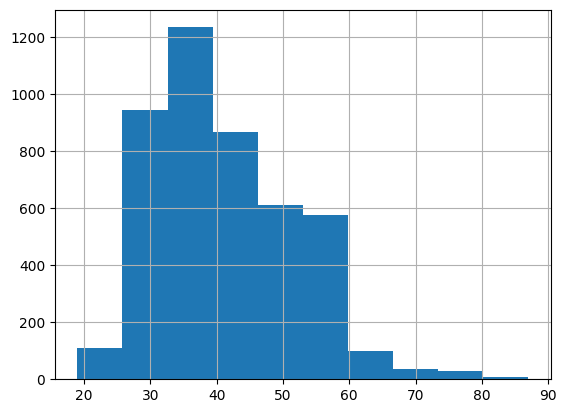

In [ ]:
dados.age.hist()

<Axes: >

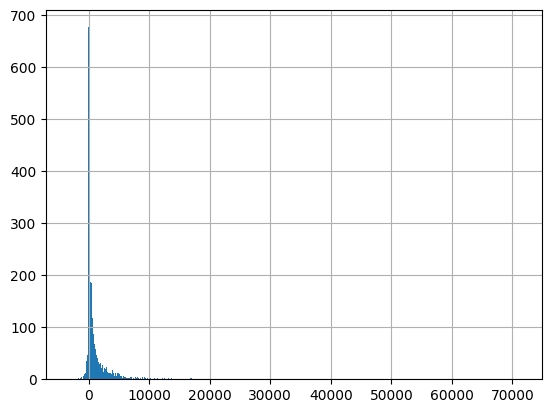

In [ ]:
dados.balance.hist(bins=1000)

<Axes: >

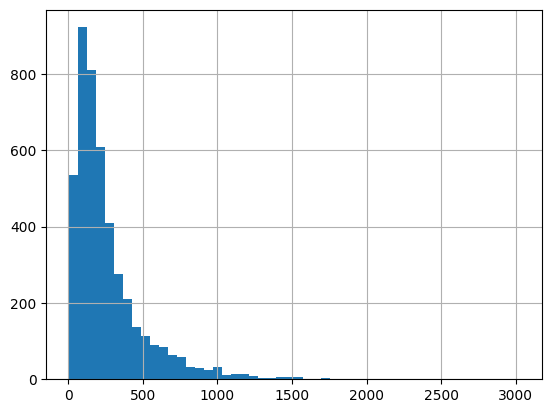

In [ ]:
dados.duration.hist(bins=50)

# Testando medidas de proximidade
Medidas: Euclidiana, Manhattan, Suprema (chebyshev)

Usaremos o método NearestNeighbors do Scikit-Learn para testar nossas medidas de proximidade.

**metric** = define a medida de proximidade desejada

**n_neighbors** = determina quantos vizinhos mais próximos iremos localizar considerando a medida selecionada.

In [ ]:
nbrs = NearestNeighbors(metric='euclidean',n_neighbors=7).fit(dados)

Vamos localizar 7 objetos mais próximos de acordo com atributos definidos manualmente.

In [ ]:
age = 30
balance = 200
duration = 30

distances, indices = nbrs.kneighbors([[age,balance,duration]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


A variável *indices* armazena os IDs (pandas) dos objetos mais próximos encontrados.

A variável *distances* armazena os valores das distâncias.

In [ ]:
indices[0]

array([ 355, 3821, 3570, 3535, 3628, 2083, 2352])

In [ ]:
distances

array([[ 9.        , 13.49073756, 14.07124728, 18.05547009, 19.72308292,
        20.51828453, 23.62202362]])

Vamos usar essas variáveis para filtrar os objetos mais próximos em um dataframe do pandas.

In [ ]:
resultado = dados.iloc[indices[0]]
resultado

,age,balance,duration
355,30,209,30
3821,31,191,40
3570,39,209,36
3535,48,199,29
3628,29,182,38
2083,42,214,21
2352,39,179,36


Vamos adicionar os valores de distância nos nossos resultados.

In [ ]:
resultado['distance'] = distances[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
resultado

,age,balance,duration,distance
355,30,209,30,9.000000
3821,31,191,40,13.490738
3570,39,209,36,14.071247
3535,48,199,29,18.055470
3628,29,182,38,19.723083
2083,42,214,21,20.518285
2352,39,179,36,23.622024


Agora, vamos repetir esse procedimento para outras medidas de proximidade e comparar os resultados.

In [ ]:
nbrs = NearestNeighbors(metric='manhattan',n_neighbors=7).fit(dados)

age = 30
balance = 200
duration = 30

distances, indices = nbrs.kneighbors([[age,balance,duration]])
resultado = dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-16-cef9102a49ff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['distance'] = distances[0]


,age,balance,duration,distance
355,30,209,30,9.0
3821,31,191,40,20.0
3535,48,199,29,20.0
3570,39,209,36,24.0
3628,29,182,38,27.0
2267,30,185,11,34.0
4147,30,227,23,34.0


In [ ]:
nbrs = NearestNeighbors(metric='chebyshev',n_neighbors=7).fit(dados)

age = 30
balance = 200
duration = 30

distances, indices = nbrs.kneighbors([[age,balance,duration]])
resultado = dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-17-64c7837140f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['distance'] = distances[0]


,age,balance,duration,distance
355,30,209,30,9.0
3570,39,209,36,9.0
3821,31,191,40,10.0
2083,42,214,21,14.0
2294,48,197,47,18.0
3628,29,182,38,18.0
3535,48,199,29,18.0


In [ ]:
nbrs = NearestNeighbors(metric='minkowski',n_neighbors=7, p=2).fit(dados)

age = 30
balance = 200
duration = 30

distances, indices = nbrs.kneighbors([[age,balance,duration]])
resultado = dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-18-b293b105555b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['distance'] = distances[0]


,age,balance,duration,distance
355,30,209,30,9.000000
3821,31,191,40,13.490738
3570,39,209,36,14.071247
3535,48,199,29,18.055470
3628,29,182,38,19.723083
2083,42,214,21,20.518285
2352,39,179,36,23.622024


In [ ]:
dados.describe()

,age,balance,duration
count,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292
std,10.576211,3009.638142,259.856633
min,19.000000,-3313.000000,4.000000
25%,33.000000,69.000000,104.000000
50%,39.000000,444.000000,185.000000
75%,49.000000,1480.000000,329.000000
max,87.000000,71188.000000,3025.000000


# Testando o efeito da normalização dos dados na medida de proximidade

In [ ]:
dados.var()

age         1.118562e+02
balance     9.057922e+06
duration    6.752547e+04
dtype: float64

In [ ]:
nbrs = NearestNeighbors(metric='euclidean',n_neighbors=7).fit(dados)

objeto_id = 5
print(dados.loc[objeto_id],"\n")
age = dados.loc[objeto_id].age
balance = dados.loc[objeto_id].balance
duration = dados.loc[objeto_id].duration

distances, indices = nbrs.kneighbors([[age,balance,duration]])
resultado = dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

age          35
balance     747
duration    141
Name: 5, dtype: int64 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-20-9c2506db8004>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['distance'] = distances[0]


,age,balance,duration,distance
5,35,747,141,0.000000
406,41,744,125,17.349352
1347,29,751,121,21.260292
4286,39,722,141,25.317978
2302,28,769,153,26.019224
2528,33,745,115,26.153394
1057,23,736,119,27.367864


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() # normalização min-max
dados_norm = pd.DataFrame(min_max_scaler.fit_transform(dados))
dados_norm.columns = dados.columns
dados_norm

,age,balance,duration
0,0.161765,0.068455,0.024826
1,0.205882,0.108750,0.071500
2,0.235294,0.062590,0.059914
3,0.161765,0.064281,0.064548
4,0.588235,0.044469,0.073486
...,...,...,...
4516,0.205882,0.039999,0.107580
4517,0.558824,0.000000,0.049321
4518,0.558824,0.048429,0.048659
4519,0.132353,0.059731,0.041377


In [ ]:
dados_norm.describe()

,age,balance,duration
count,4521.000000,4521.000000,4521.000000
mean,0.326031,0.063565,0.086051
std,0.155533,0.040397,0.086017
min,0.000000,0.000000,0.000000
25%,0.205882,0.045395,0.033102
50%,0.294118,0.050429,0.059914
75%,0.441176,0.064335,0.107580
max,1.000000,1.000000,1.000000


In [ ]:
dados_norm.var()

age         0.024190
balance     0.001632
duration    0.007399
dtype: float64

In [ ]:
dados_norm

,age,balance,duration
0,0.161765,0.068455,0.024826
1,0.205882,0.108750,0.071500
2,0.235294,0.062590,0.059914
3,0.161765,0.064281,0.064548
4,0.588235,0.044469,0.073486
...,...,...,...
4516,0.205882,0.039999,0.107580
4517,0.558824,0.000000,0.049321
4518,0.558824,0.048429,0.048659
4519,0.132353,0.059731,0.041377


In [ ]:
nbrs = NearestNeighbors(metric='euclidean',n_neighbors=7).fit(dados_norm)

objeto_id = 5
print(dados_norm.loc[objeto_id],"\n")
age = dados_norm.loc[objeto_id].age
balance = dados_norm.loc[objeto_id].balance
duration = dados_norm.loc[objeto_id].duration

distances, indices = nbrs.kneighbors([[age,balance,duration]])
resultado = dados_norm.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

age         0.235294
balance     0.054496
duration    0.045349
Name: 5, dtype: float64 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-24-62ecc5816375>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['distance'] = distances[0]


,age,balance,duration,distance
5,0.235294,0.054496,0.045349,0.000000
829,0.235294,0.054053,0.043363,0.002035
2100,0.235294,0.052966,0.041046,0.004567
1242,0.235294,0.048469,0.043363,0.006346
638,0.235294,0.048160,0.046342,0.006413
1046,0.235294,0.048295,0.043694,0.006418
1544,0.235294,0.059234,0.040715,0.006628


In [ ]:
nbrs = NearestNeighbors(metric='manhattan',n_neighbors=7).fit(dados_norm)

objeto_id = 5
print(dados_norm.loc[objeto_id],"\n")
age = dados_norm.loc[objeto_id].age
balance = dados_norm.loc[objeto_id].balance
duration = dados_norm.loc[objeto_id].duration

distances, indices = nbrs.kneighbors([[age,balance,duration]])
resultado = dados_norm.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

age         0.235294
balance     0.054496
duration    0.045349
Name: 5, dtype: float64 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-25-64b1b6d90fbd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['distance'] = distances[0]


,age,balance,duration,distance
5,0.235294,0.054496,0.045349,0.000000
829,0.235294,0.054053,0.043363,0.002429
2100,0.235294,0.052966,0.041046,0.005833
638,0.235294,0.048160,0.046342,0.007329
1046,0.235294,0.048295,0.043694,0.007856
2873,0.235294,0.046617,0.045349,0.007879
1242,0.235294,0.048469,0.043363,0.008013


# Leitura dos dados *bank_marketing_binary.csv*

Usamos o pandas para leitura do arquivo CSV.
Em seguida, as 30 primeiras linhas são exibidas.
Os dados já estão pré-processados.

Cada linha representa um cliente do banco. Cada coluna representa um **atributo binário** do cliente.

In [ ]:
dados = pd.read_csv('bank_marketing_binary.csv')
dados.head(30)

,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,loan,housing
0,0,1,0,1,0,0,1,0,0
1,0,1,0,0,1,0,1,1,1
2,0,0,1,0,0,1,1,0,1
3,0,1,0,0,0,1,0,1,1
4,0,1,0,0,1,0,0,0,1
5,0,0,1,0,0,1,1,0,0
6,0,1,0,0,0,1,1,0,1
7,0,1,0,0,1,0,1,0,1
8,0,1,0,0,0,1,0,0,1
9,0,1,0,1,0,0,1,1,1


In [ ]:
nbrs = NearestNeighbors(metric='jaccard',n_neighbors=70).fit(dados)

marital_divorced=1
marital_married=0
marital_single=0

education_primary=0
education_secondary=0
education_tertiary=1

contact_cellular=1
loan=0
housing=1

distances, indices = nbrs.kneighbors([[marital_divorced,
                                       marital_married,
                                       marital_single,
                                       education_primary,
                                       education_secondary,
                                       education_tertiary,
                                       contact_cellular,
                                       loan,
                                       housing]])
resultado = dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
<ipython-input-28-d5ab38a20353>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['distance'] = distances[0]


,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,loan,housing,distance
4124,1,0,0,0,0,1,1,0,1,0.00
412,1,0,0,0,0,1,1,0,1,0.00
4229,1,0,0,0,0,1,1,0,1,0.00
400,1,0,0,0,0,1,1,0,1,0.00
203,1,0,0,0,0,1,1,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...
1977,1,0,0,0,0,1,1,0,0,0.25
647,1,0,0,0,0,1,0,0,1,0.25
1372,1,0,0,0,0,1,0,0,1,0.25
2104,1,0,0,0,0,1,1,0,0,0.25


# Informações complementares

* Outra medidas de distâncias no Scikit-Learn:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
